# German Credit Data
For more information consider given docs file presented inside the main folder.

### Importing Packages

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### Loading Dataset

In [94]:
df = pd.read_csv('german.data', delimiter=' ')
df.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


### Assigning Columns

In [95]:
df.columns = ['Status checking acc','Duration in month','Credit history','Purpose','Credit amount','Savings account/bonds','Present emplyment since','Percentage of disposable income','Personal status and sex','Other debtors/Guarantors','Present residence since','Property','Age','Other installment plans','Housing','Existing credits at bank','Job','Liable to provide maintenance','Telephone','Foreign worker','Class']
df.columns

Index(['Status checking acc', 'Duration in month', 'Credit history', 'Purpose',
       'Credit amount', 'Savings account/bonds', 'Present emplyment since',
       'Percentage of disposable income', 'Personal status and sex',
       'Other debtors/Guarantors', 'Present residence since', 'Property',
       'Age', 'Other installment plans', 'Housing', 'Existing credits at bank',
       'Job', 'Liable to provide maintenance', 'Telephone', 'Foreign worker',
       'Class'],
      dtype='object')

## Exploratory Data Analysis

### Information related to Dataset

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Status checking acc              999 non-null    object
 1   Duration in month                999 non-null    int64 
 2   Credit history                   999 non-null    object
 3   Purpose                          999 non-null    object
 4   Credit amount                    999 non-null    int64 
 5   Savings account/bonds            999 non-null    object
 6   Present emplyment since          999 non-null    object
 7   Percentage of disposable income  999 non-null    int64 
 8   Personal status and sex          999 non-null    object
 9   Other debtors/Guarantors         999 non-null    object
 10  Present residence since          999 non-null    int64 
 11  Property                         999 non-null    object
 12  Age                              999

### Checking for missing values

In [97]:
df.isnull().sum()

Status checking acc                0
Duration in month                  0
Credit history                     0
Purpose                            0
Credit amount                      0
Savings account/bonds              0
Present emplyment since            0
Percentage of disposable income    0
Personal status and sex            0
Other debtors/Guarantors           0
Present residence since            0
Property                           0
Age                                0
Other installment plans            0
Housing                            0
Existing credits at bank           0
Job                                0
Liable to provide maintenance      0
Telephone                          0
Foreign worker                     0
Class                              0
dtype: int64

### Checking for N-Unique values & Value counts

In [98]:
df.nunique()

Status checking acc                  4
Duration in month                   33
Credit history                       5
Purpose                             10
Credit amount                      921
Savings account/bonds                5
Present emplyment since              5
Percentage of disposable income      4
Personal status and sex              4
Other debtors/Guarantors             3
Present residence since              4
Property                             4
Age                                 53
Other installment plans              3
Housing                              3
Existing credits at bank             4
Job                                  4
Liable to provide maintenance        2
Telephone                            2
Foreign worker                       2
Class                                2
dtype: int64

In [99]:
df.value_counts()

Status checking acc  Duration in month  Credit history  Purpose  Credit amount  Savings account/bonds  Present emplyment since  Percentage of disposable income  Personal status and sex  Other debtors/Guarantors  Present residence since  Property  Age  Other installment plans  Housing  Existing credits at bank  Job   Liable to provide maintenance  Telephone  Foreign worker  Class
A11                  6                  A31             A46      1198           A61                    A75                      4                                A92                      A101                      4                        A124      35   A143                     A153     1                         A173  1                              A191       A201            2        1
A14                  10                 A32             A42      2210           A61                    A73                      2                                A93                      A101                      2                  

### Selecting Object columns and Encoding them
Data encoding has done for EDA process but we will be making prepration pipeline for data encoding and data standardization.

In [100]:
df_categorical = df.select_dtypes('object')
ordinal_encoder = OrdinalEncoder()
df[df_categorical.columns] = ordinal_encoder.fit_transform(df_categorical)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status checking acc              999 non-null    float64
 1   Duration in month                999 non-null    int64  
 2   Credit history                   999 non-null    float64
 3   Purpose                          999 non-null    float64
 4   Credit amount                    999 non-null    int64  
 5   Savings account/bonds            999 non-null    float64
 6   Present emplyment since          999 non-null    float64
 7   Percentage of disposable income  999 non-null    int64  
 8   Personal status and sex          999 non-null    float64
 9   Other debtors/Guarantors         999 non-null    float64
 10  Present residence since          999 non-null    int64  
 11  Property                         999 non-null    float64
 12  Age                   

### Dataset Overview after Encoding

In [101]:
df.head()

,Status checking acc,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present emplyment since,Percentage of disposable income,Personal status and sex,Other debtors/Guarantors,...,Property,Age,Other installment plans,Housing,Existing credits at bank,Job,Liable to provide maintenance,Telephone,Foreign worker,Class
0,1.0,48,2.0,4.0,5951,0.0,2.0,2,1.0,0.0,...,0.0,22,2.0,1.0,1,2.0,1,0.0,0.0,2
1,3.0,12,4.0,7.0,2096,0.0,3.0,2,2.0,0.0,...,0.0,49,2.0,1.0,1,1.0,2,0.0,0.0,1
2,0.0,42,2.0,3.0,7882,0.0,3.0,2,2.0,2.0,...,1.0,45,2.0,2.0,1,2.0,2,0.0,0.0,1
3,0.0,24,3.0,0.0,4870,0.0,2.0,3,2.0,0.0,...,3.0,53,2.0,2.0,2,2.0,2,0.0,0.0,2
4,3.0,36,2.0,7.0,9055,4.0,2.0,2,2.0,0.0,...,3.0,35,2.0,2.0,1,1.0,2,1.0,0.0,1


### Checking for correlations

[]

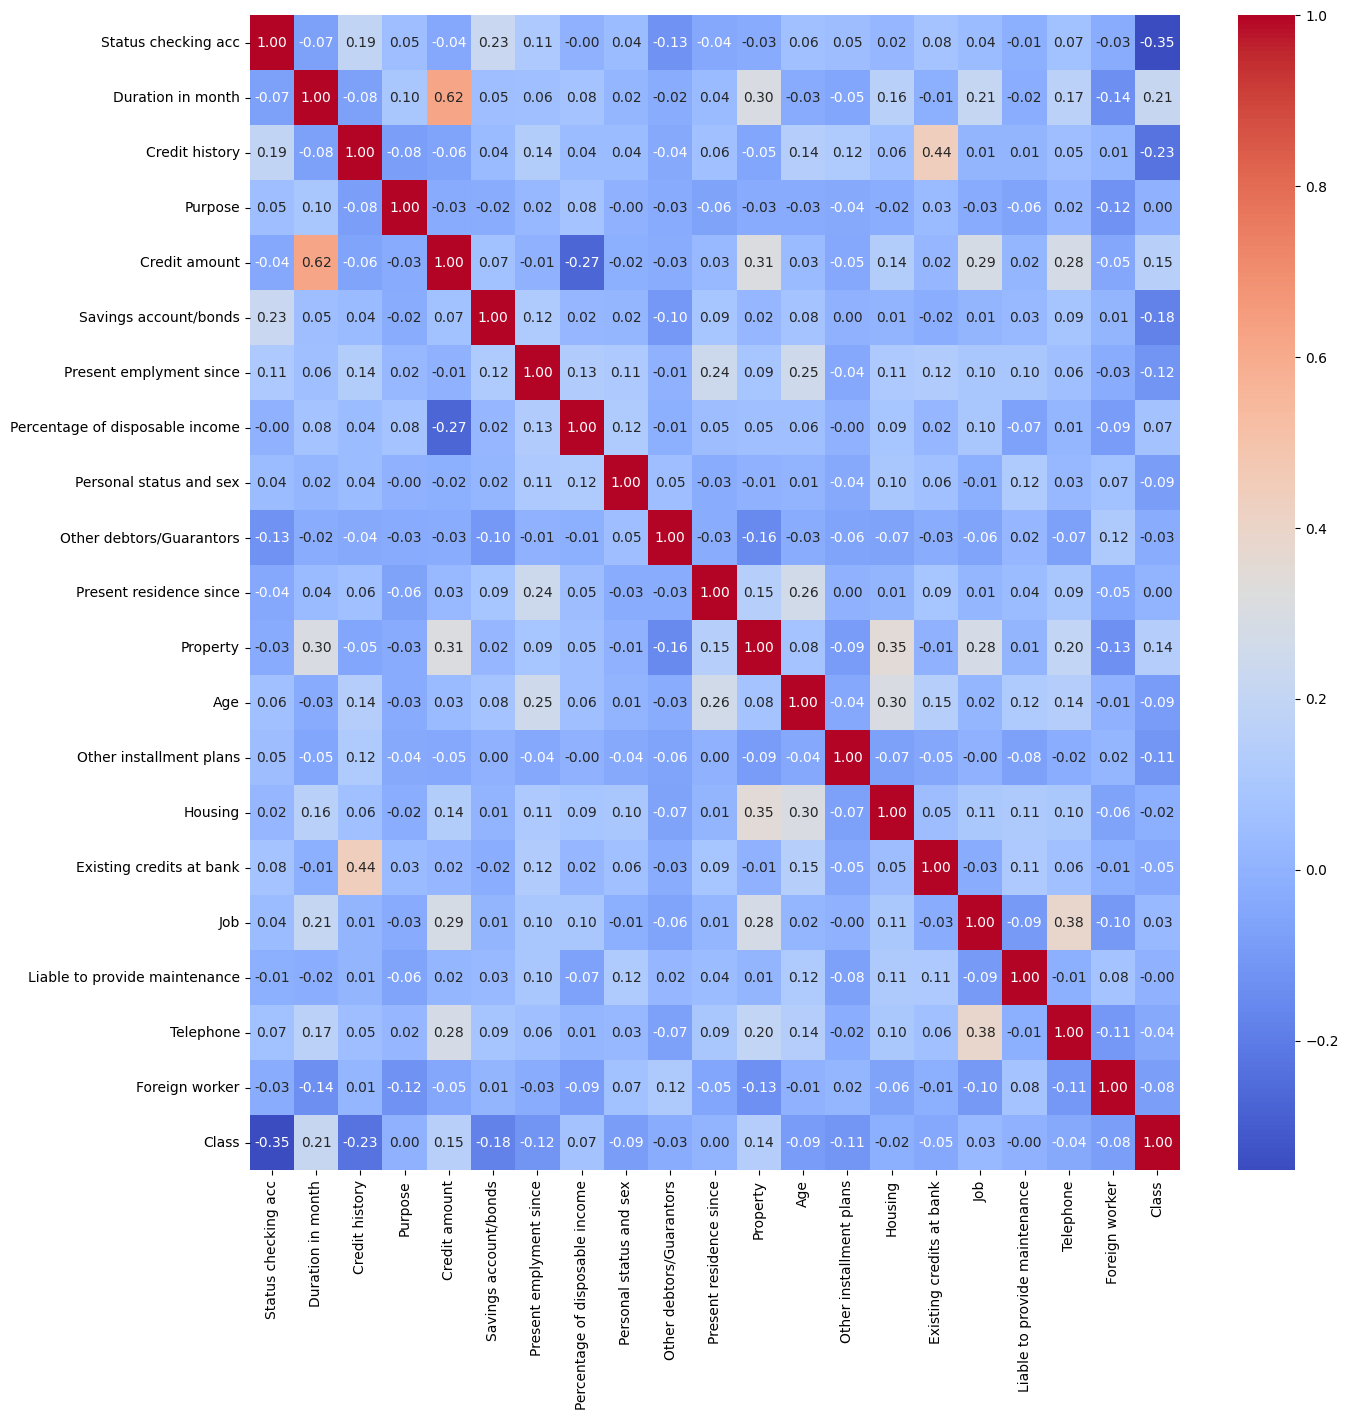

In [102]:
df_correlations = df.corr()
plt.figure(figsize=(15,15))
df_correlations_plot = sns.heatmap(df_correlations,annot=True,fmt='.2f',cmap='coolwarm')
plt.plot()

### Spitting in Features and Labels

In [103]:
df_features = df.drop('Class',axis=1)
df_label = df[['Class']]
print(df_features.shape)
print(df_label.shape)

(999, 20)
(999, 1)


### Checking for Imbalanced data
Class 1 has: 699 records and Class 2 has: 300 records as per the machine learning accuracy we will figure out whether we need to add handle imbalanced data or not.

In [104]:
df_label.value_counts()

Class
1        699
2        300
dtype: int64

### Plotting Duration in month vs Credit history

0    2.0
1    4.0
2    2.0
3    3.0
4    2.0
Name: Credit history, dtype: float64
0    48
1    12
2    42
3    24
4    36
Name: Duration in month, dtype: int64


Text(0.5, 1.0, 'Duration in month vs Credit history')

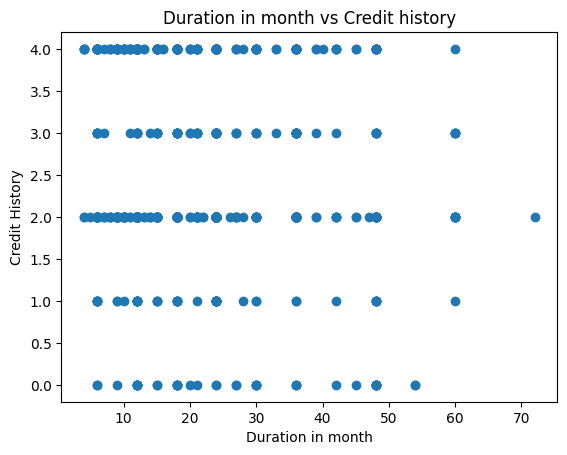

In [105]:
print(df_features['Credit history'].head())
print(df_features['Duration in month'].head())
plt.scatter(df_features['Duration in month'],df_features['Credit history'])
plt.xlabel("Duration in month")
plt.ylabel("Credit History")
plt.title("Duration in month vs Credit history")

### Plotting Duration in month vs Credit amount

Text(0.5, 1.0, 'Duration in month vs Credit amount')

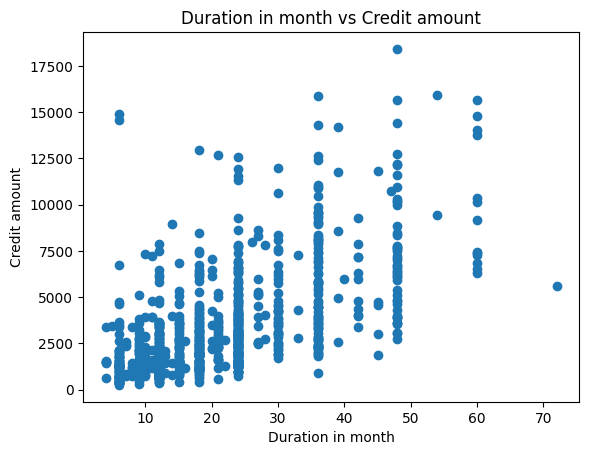

In [106]:
plt.scatter(df_features['Duration in month'],df_features['Credit amount'])
plt.xlabel("Duration in month")
plt.ylabel("Credit amount")
plt.title("Duration in month vs Credit amount")

### Checking for an Outlier

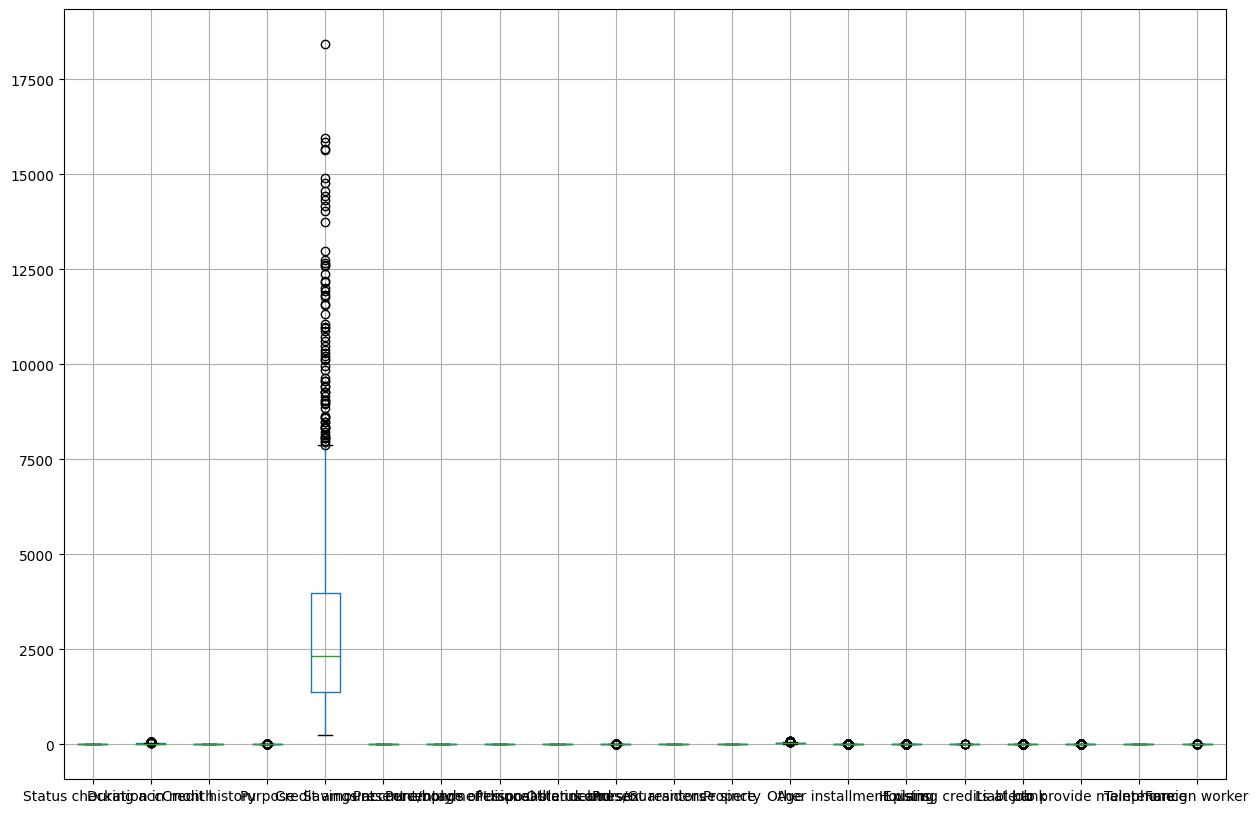

In [107]:
plt.figure(figsize=(15,10))
df_features.boxplot()
plt.show()

### Removing Outliers

In [108]:
threshold = 1.5
Q1 = df_features.quantile(0.25)
Q3 = df_features.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
df_feature_outlier_removed = df_features[(df_features > lower_bound) & (df_features < upper_bound)]


## Data Preprocessing

### Transformation Pipeline 
- Passing two estimators: 
    - OrdinalEncoder: for Encoding
    - StandardScaler: for normalize the data
- Applying it on Features

In [109]:
full_pipeline = Pipeline([
    ('encoding',OrdinalEncoder()),
    ('imputer',SimpleImputer()),
    ('scaler',StandardScaler()),
])

X_prepared = full_pipeline.fit_transform(df_feature_outlier_removed)
y_prepared = df_label.copy()
print(len(X_prepared),len(y_prepared))
print(X_prepared.shape,y_prepared.shape)
print(y_prepared.nunique())

999 999
(999, 14) (999, 1)
Class    2
dtype: int64


### Train test split
- Splitting data into train_test_split, where we are keeping 0.2 (20%) of data for test set and 80% of data for train set, applying random state for shuffling the data.
- Checking shapes for training and test set.
- Checking for type of training and testing set, got numpy.ndarray for feature (X_train, X_test) set and pd.DataFrame for label (y_train, y_test) 

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared,y_prepared,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))


(799, 14) (200, 14)
(799, 1) (200, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
